In [3]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score






In [4]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')

In [5]:
pip install graphviz==0.10


Note: you may need to restart the kernel to use updated packages.


In [6]:
dados.head(10)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
5,5,14661,2007,55405.26,yes
6,6,9990,2002,93415.61,yes
7,7,11599,2008,65265.09,no
8,8,7834,1999,43917.53,yes
9,9,14913,2003,107860.41,yes


In [7]:
troca_coluna = {'mileage_per_year': 'milhas_por_ano', 'model_year': 'ano_modelo', 'price':'preco',
               'sold': 'vendido'}
dados = dados.rename(columns = troca_coluna)

In [8]:
dados.head(10)

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
5,5,14661,2007,55405.26,yes
6,6,9990,2002,93415.61,yes
7,7,11599,2008,65265.09,no
8,8,7834,1999,43917.53,yes
9,9,14913,2003,107860.41,yes


In [9]:
troca = {'yes': 1,
        'no': 0}
dados.vendido = dados.vendido.map(troca)

In [10]:
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [11]:
from datetime import datetime
data_atual = datetime.today().year

In [12]:
dados['idade_modelo'] = data_atual - dados.ano_modelo

In [13]:
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [14]:

dados['km_por_ano'] = dados.milhas_por_ano * 1.60934

In [15]:
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [16]:
dados = dados.drop(columns= ['Unnamed: 0', 'milhas_por_ano', 'ano_modelo'])

In [17]:
dados.head()

,preco,vendido,idade_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [18]:
x = dados[['preco', 'idade_modelo', 'km_por_ano']]
y = dados['vendido']

In [19]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 78.28%


In [21]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x,teste_y)*100

print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 52.44%


In [20]:
from sklearn.dummy import DummyClassifier
dummy_most_frequent = DummyClassifier()
dummy_most_frequent.fit(treino_x, treino_y)
acuracia = dummy_most_frequent.score(teste_x, teste_y)*100


print("A acurácia do most_frequent foi %.2f%%" % acuracia)

A acurácia do most_frequent foi 58.00%


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


In [28]:
pip install scikit-learn graphviz


Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


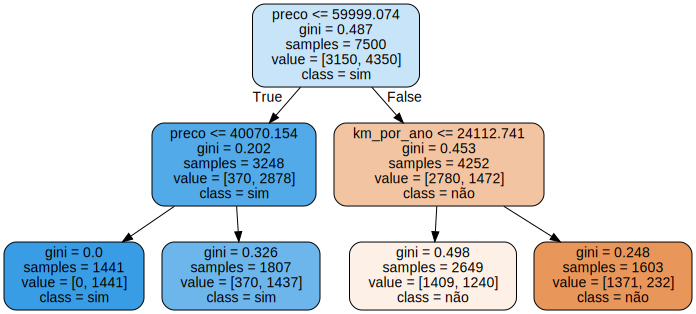

In [36]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico
